In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [34]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    actions = np.array(xrange(env.action_space.n))
    
    for ep in range(num_episodes):
        observation = env.reset()
        discount_pow = 0
        episode_states = {}
        for t in range(100):
            #print_observation(observation)
            action_dist = policy(observation)
            action = np.random.choice(actions, p=action_dist)
            #print("Taking action: {}".format( ["Stick", "Hit"][action]))
            observation, reward, done, _ = env.step(action)
            if observation not in episode_states:
                episode_states[observation] = 0
            for state in episode_states:
                episode_states[state] += (discount_factor ** discount_pow) * reward
            if done:
                break
        for state in episode_states:
            returns_sum[state] += episode_states[state]
            returns_count[state] += 1

    
    for key in returns_sum:
        avg = returns_sum[key] / returns_count[key]
        V[key] = avg
        
    return V    

In [35]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    #return 0 if score >= 20 else 1
    return np.array([1.0, 0.0]) if score >= 20 else np.array([0.0, 1.0])

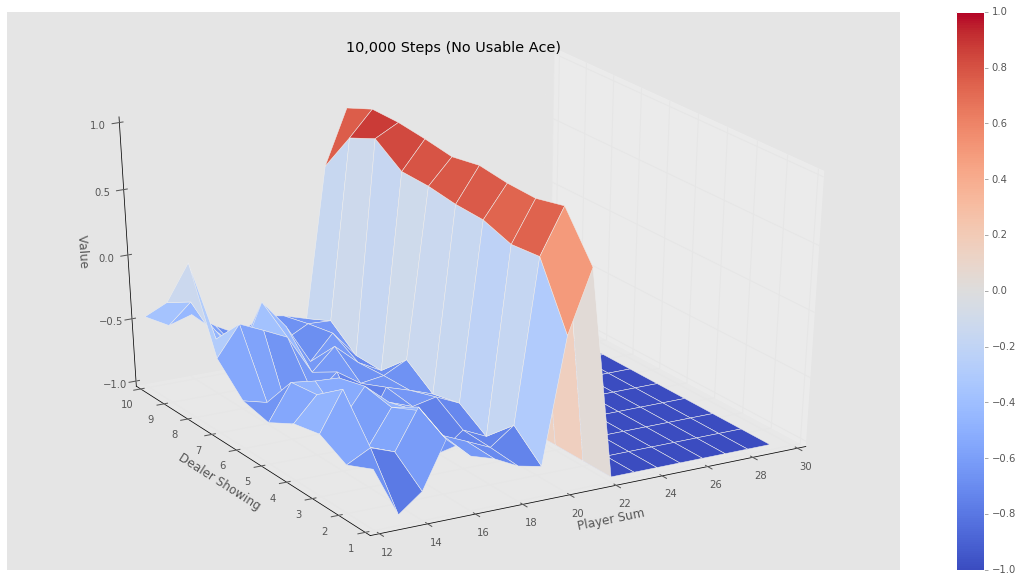

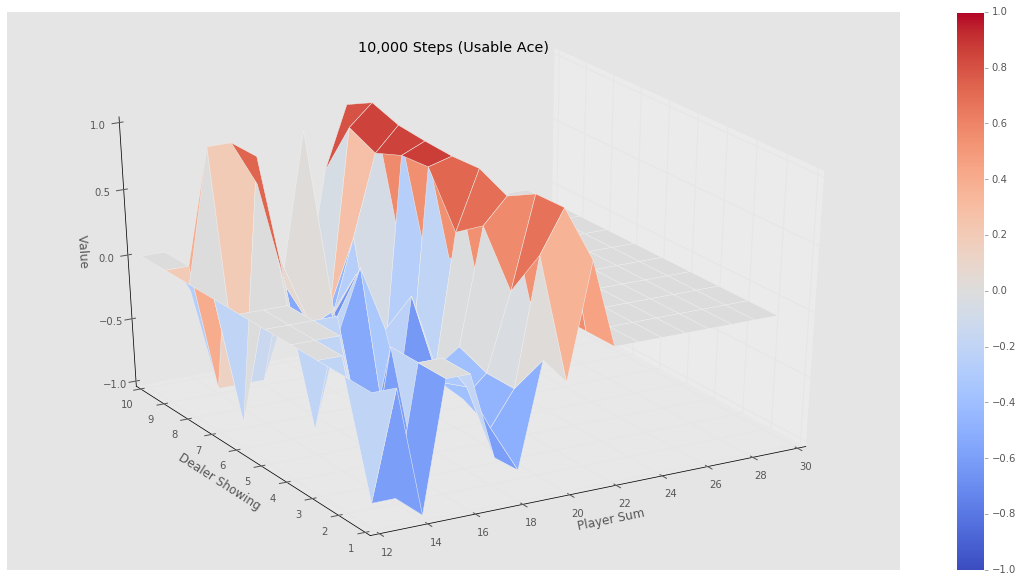

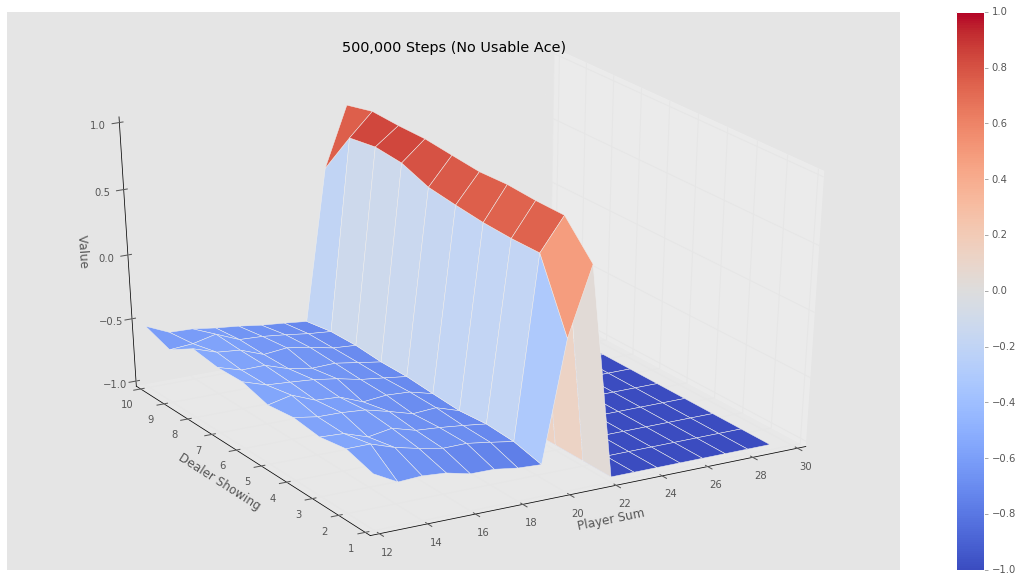

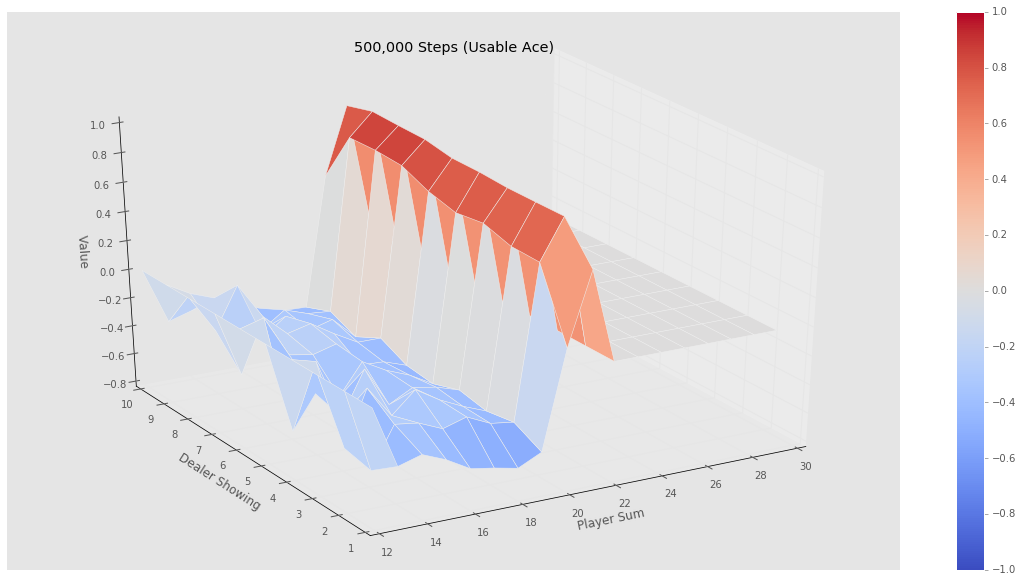

In [36]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")

In [27]:
3**2

9